[*********************100%***********************]  1 of 1 completed


Logistic Regression Accuracy: 0.51


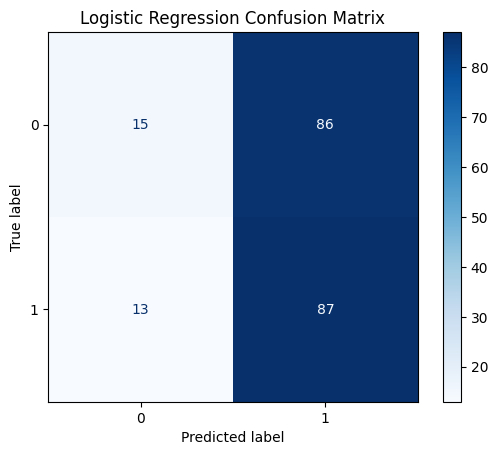

Decision Tree Accuracy: 0.52


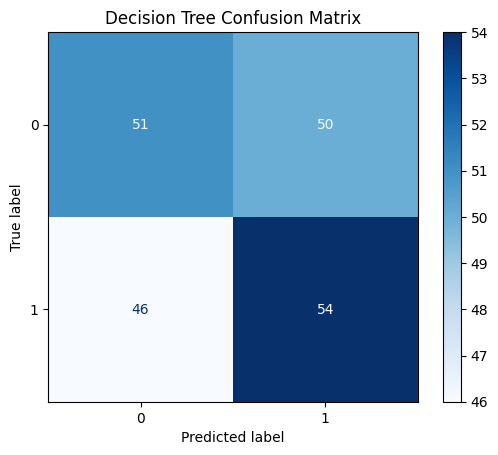

Random Forest Accuracy: 0.45


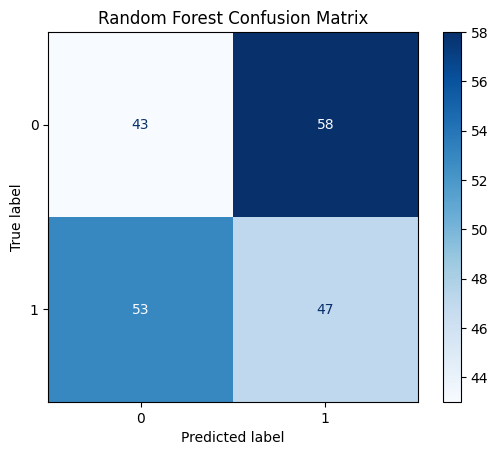

SVM Accuracy: 0.50


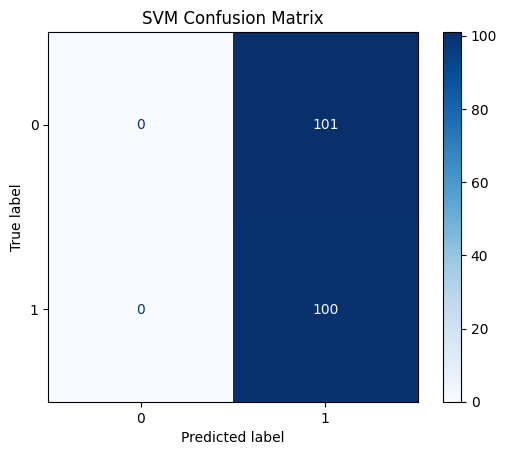

KNN Accuracy: 0.43


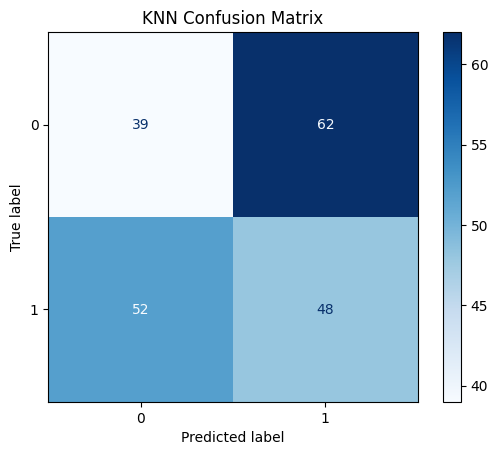

GBM Accuracy: 0.51


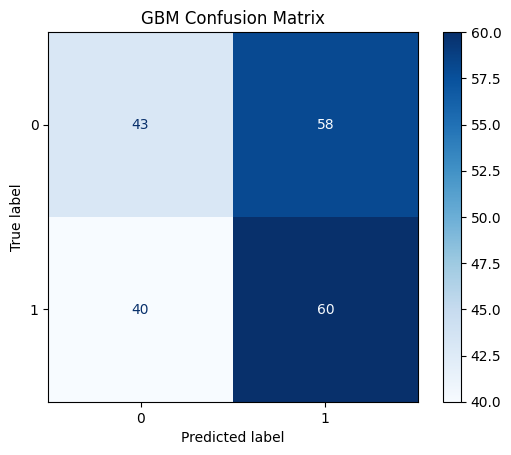

In [27]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch historical data for Apple Inc. (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
data.reset_index(inplace=True)

# Create a binary target variable: 1 if price goes up, 0 if down
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Features: Previous day's closing price and previous three closing prices
data['Close_1'] = data['Close'].shift(1)
data['Close_2'] = data['Close'].shift(2)
data['Close_3'] = data['Close'].shift(3)

# Drop rows with NaN values
data.dropna(inplace=True)

# Prepare features and target
X = data[['Close_1', 'Close_2', 'Close_3']]
y = data['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function for evaluation
def evaluate_model(y_test, predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    print(f"{model_name} Accuracy: {accuracy:.2f}")
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Gradient Boosting
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate all models
evaluate_model(y_test, logistic_predictions, "Logistic Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, svm_predictions, "SVM")
evaluate_model(y_test, knn_predictions, "KNN")
evaluate_model(y_test, gbm_predictions, "GBM")

# Plotting predictions
def plot_predictions(predictions, model_name):
    plt.figure(figsize=(14, 7))
    plt.title(f"{model_name} Predictions")
    sns.countplot(x=predictions, hue=predictions, palette='Set2', legend=False)
    plt.xlabel('Predicted Class (0: Down, 1: Up)')
    plt.ylabel('Count')
    plt.show()